<a href="https://colab.research.google.com/github/Juan2341/OpticalCharacterRecognition/blob/main/RunMyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

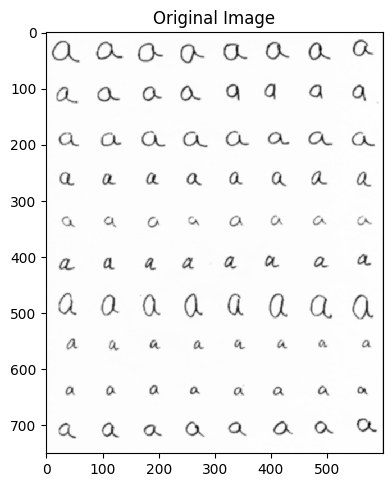

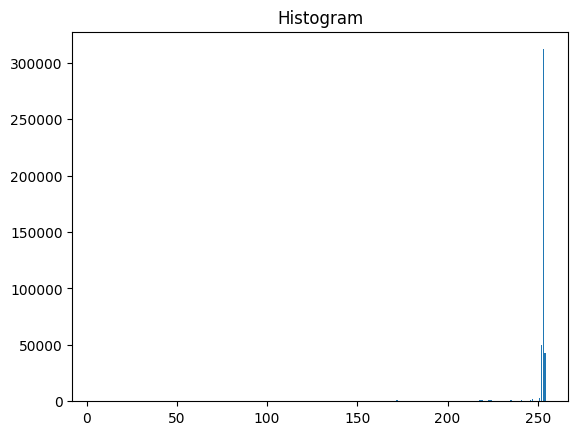

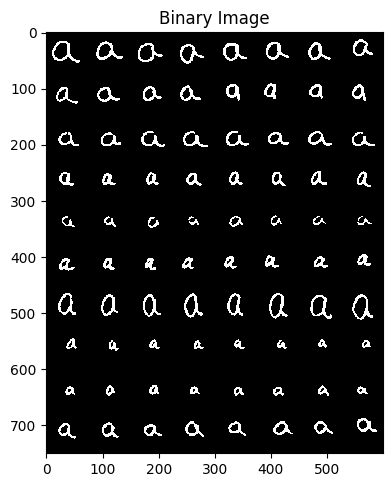

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


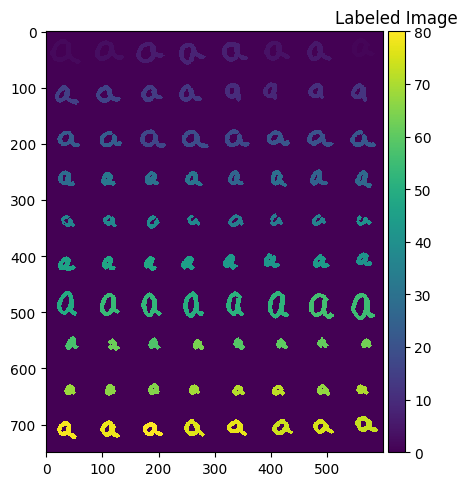

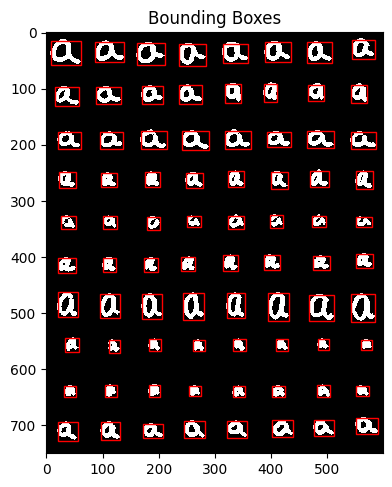

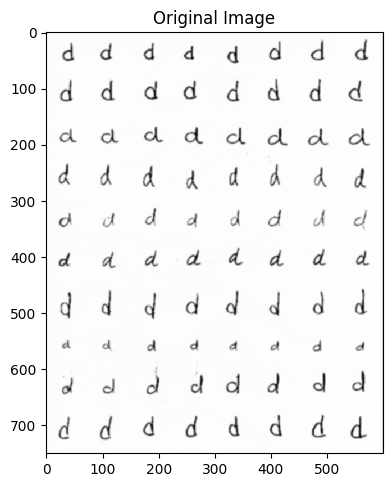

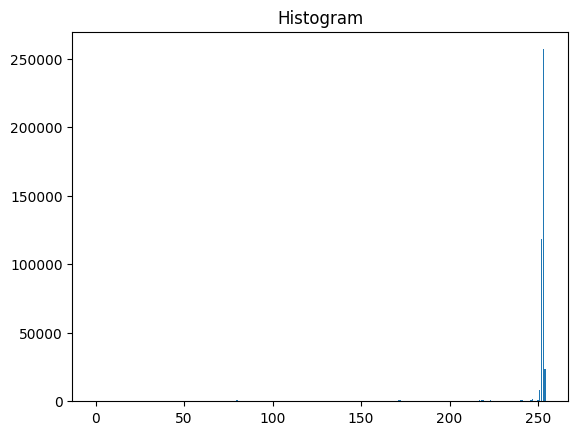

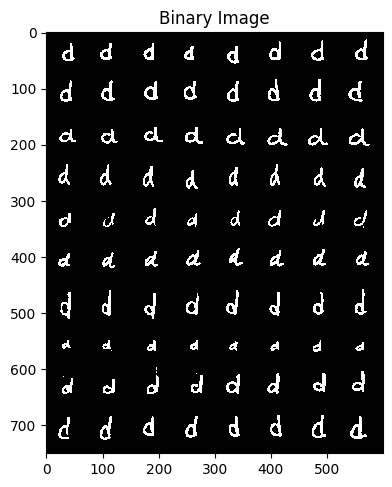

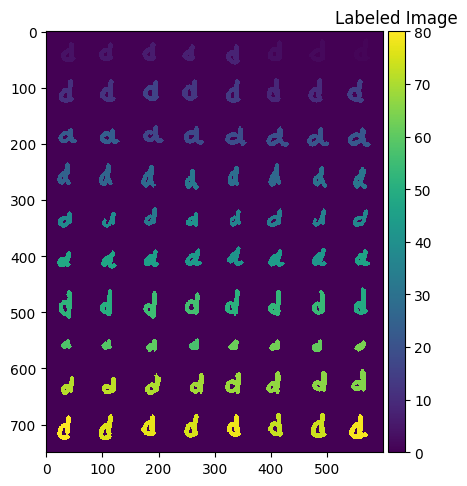

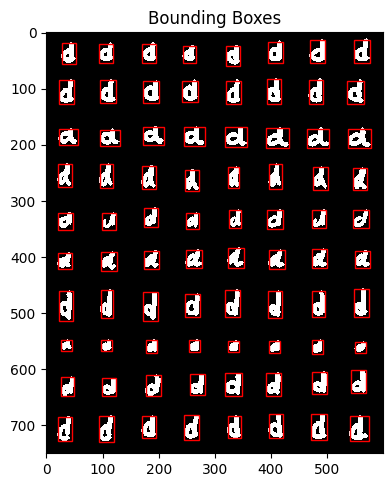

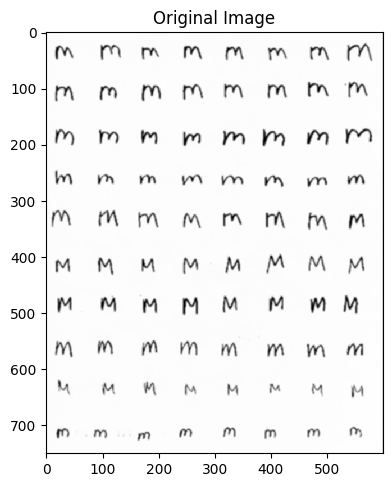

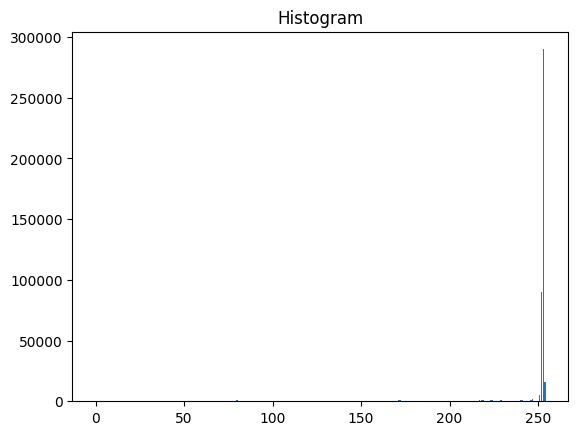

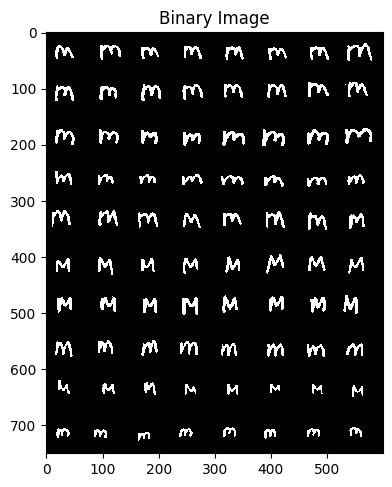

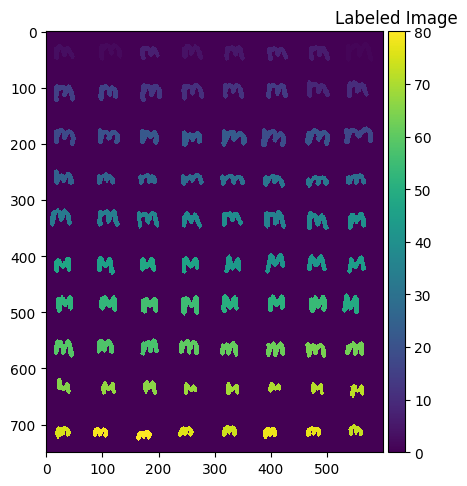

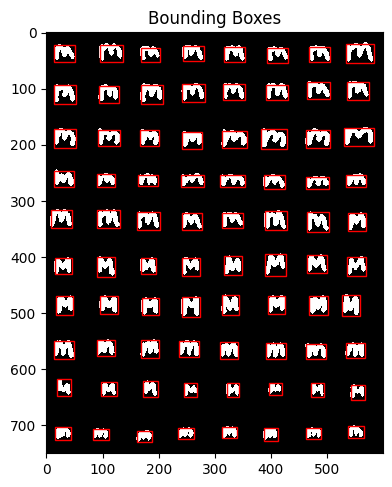

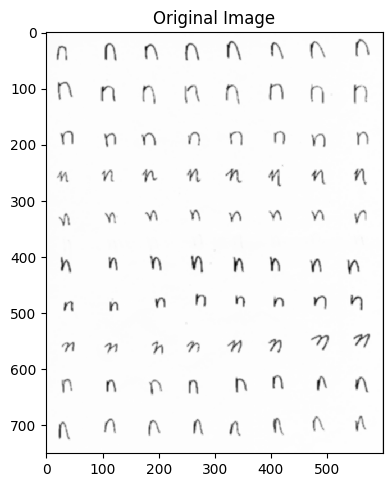

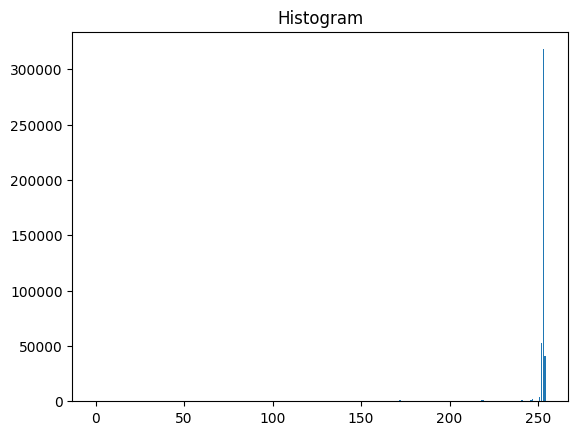

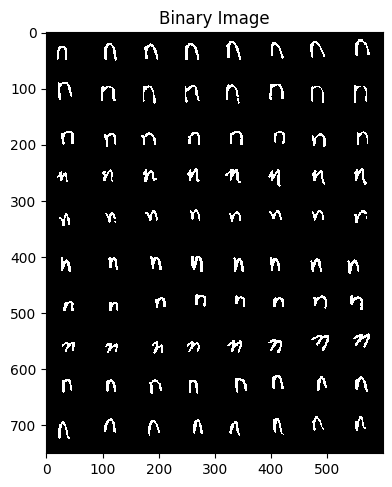

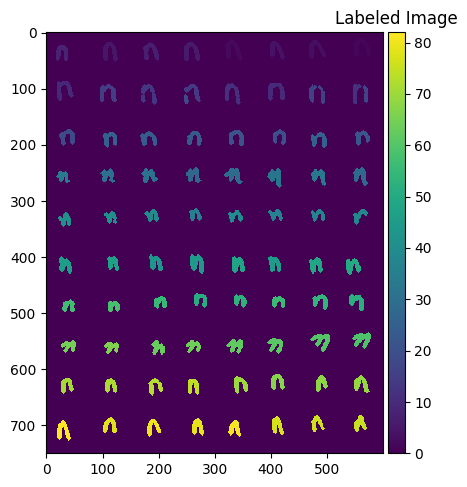

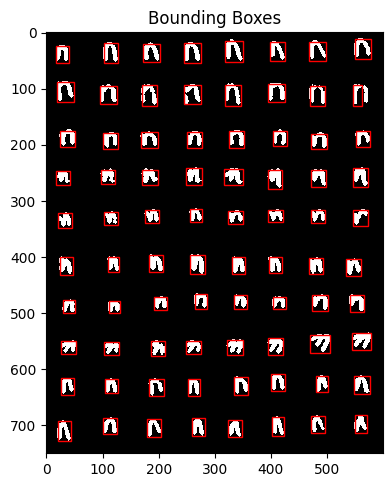

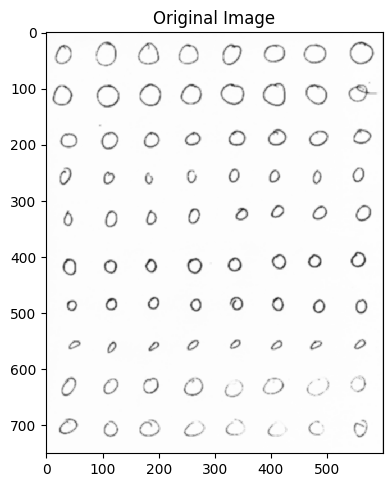

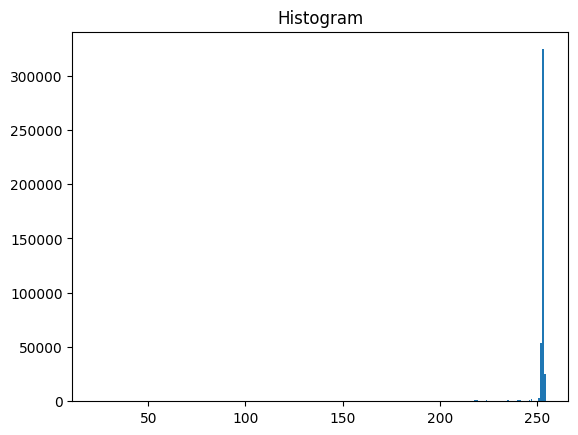

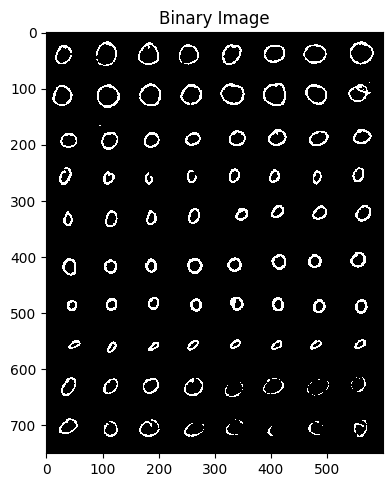

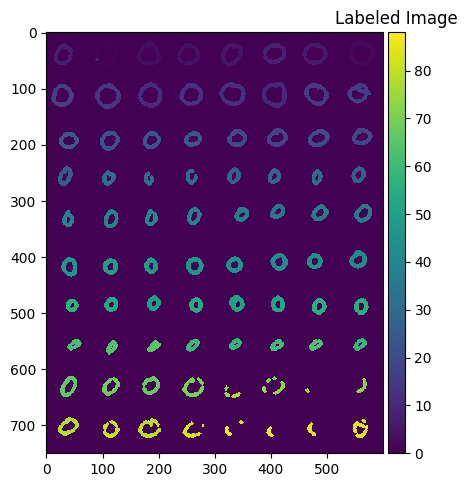

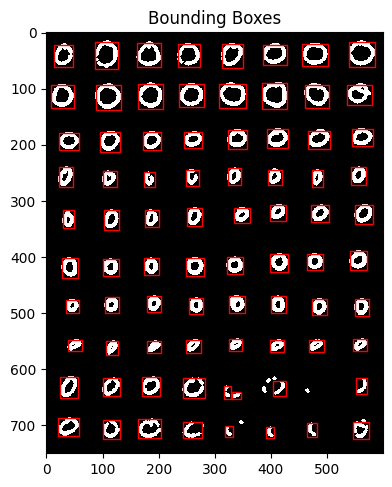

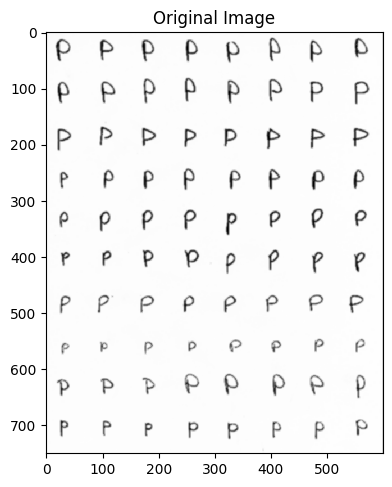

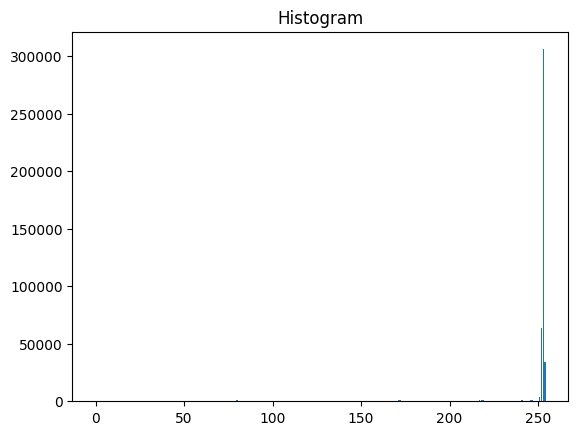

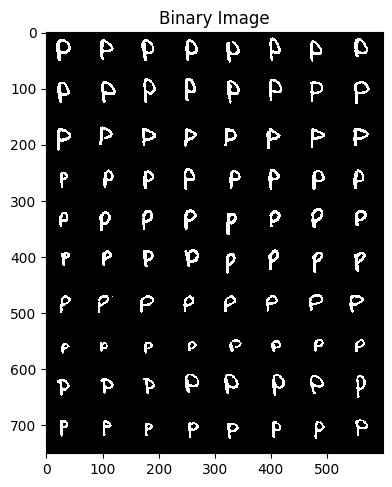

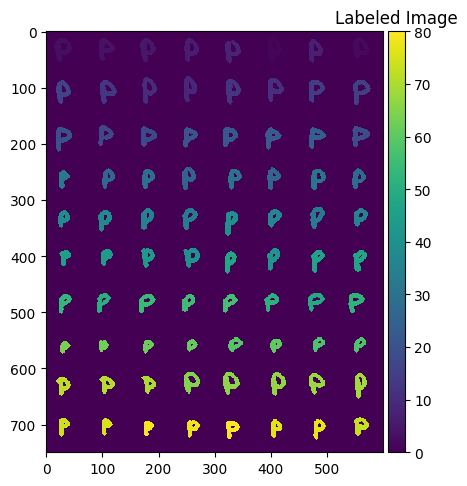

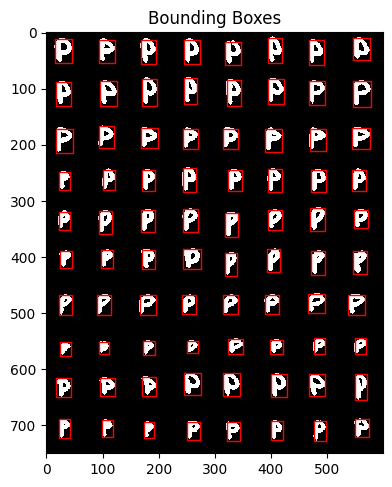

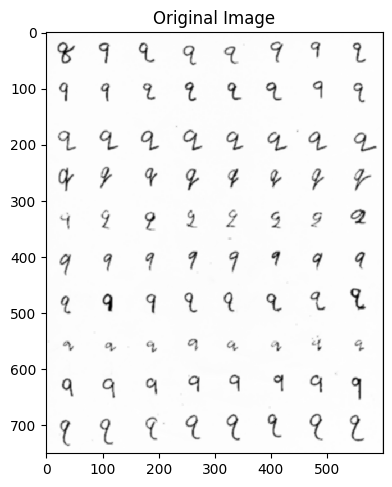

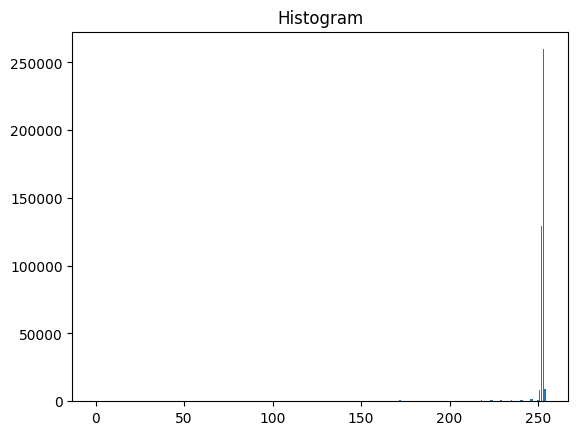

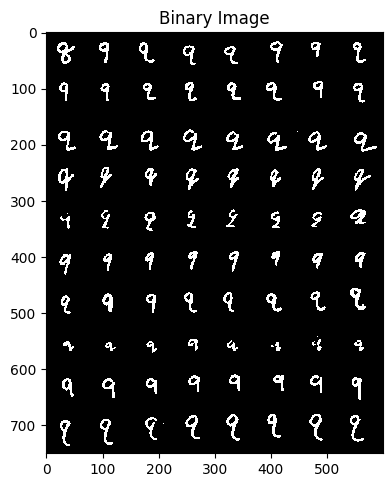

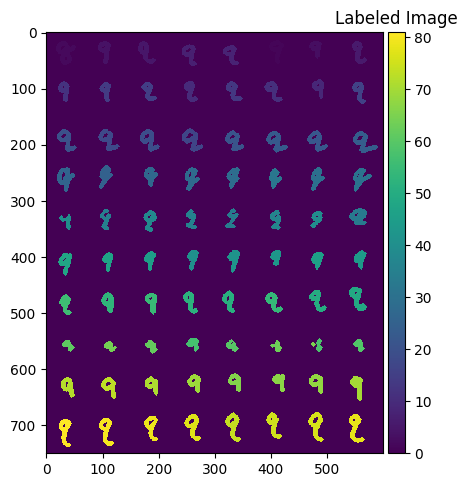

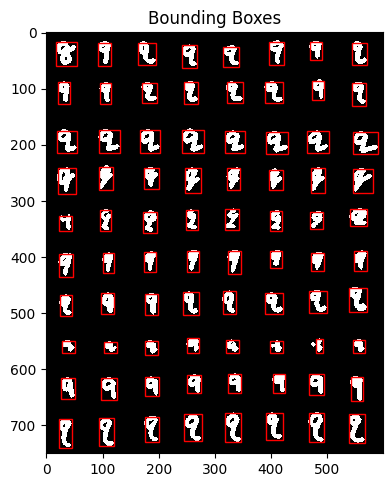

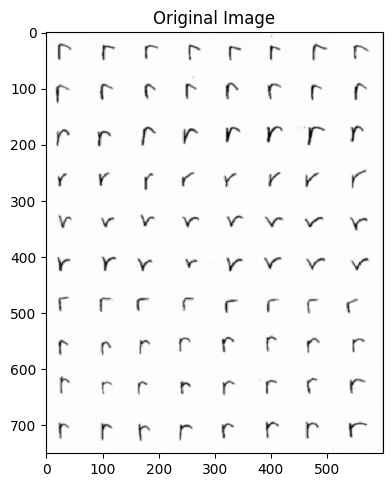

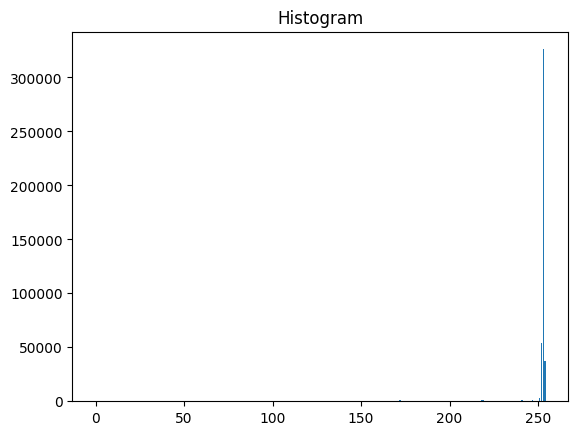

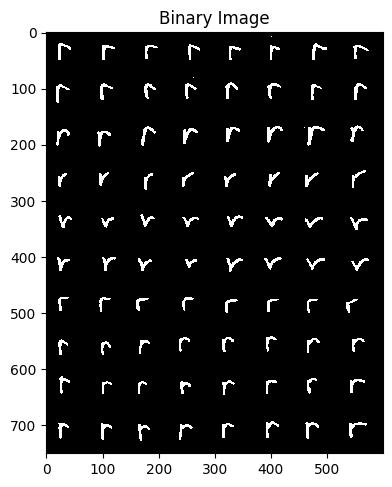

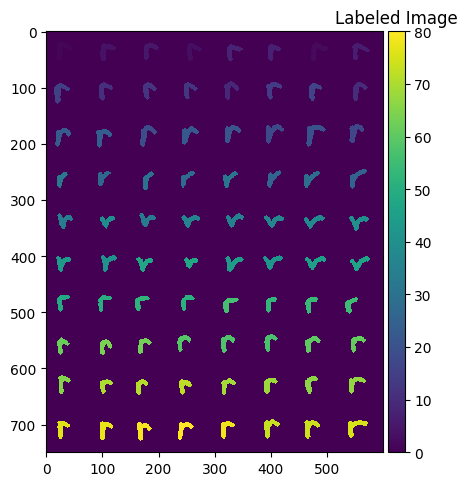

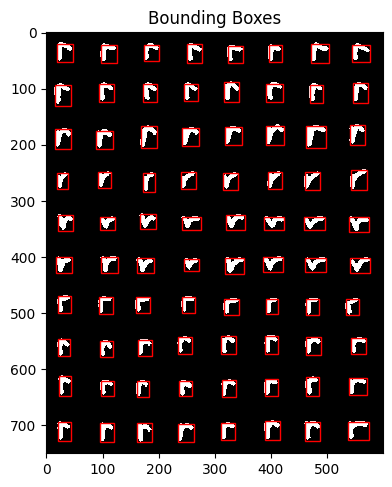

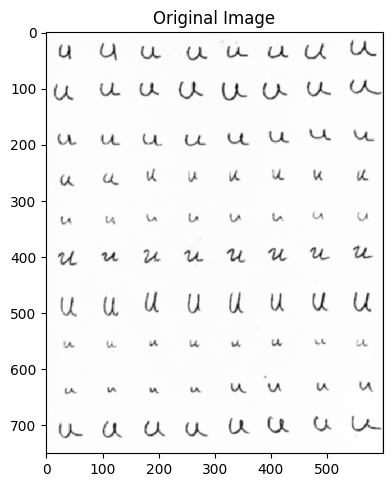

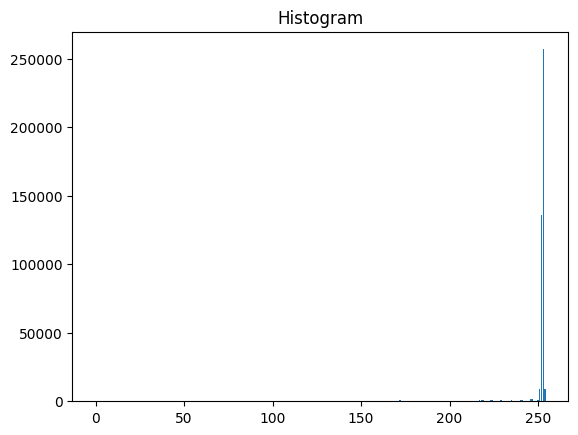

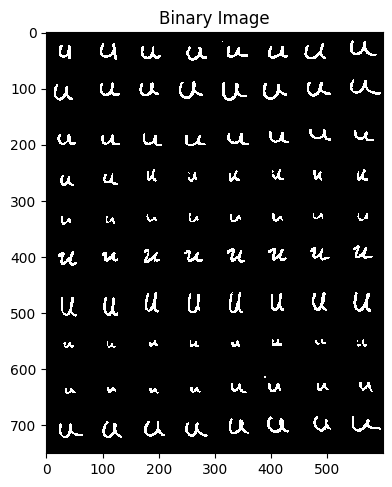

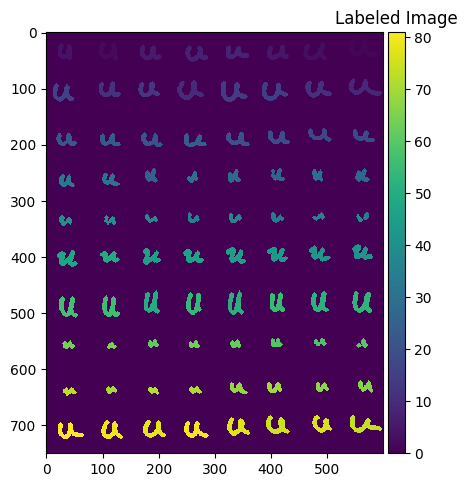

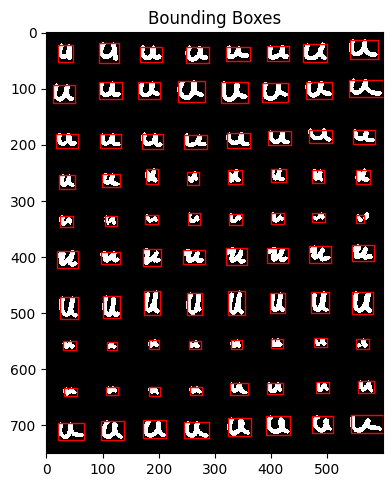

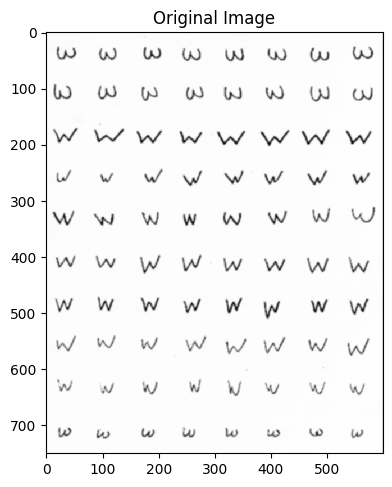

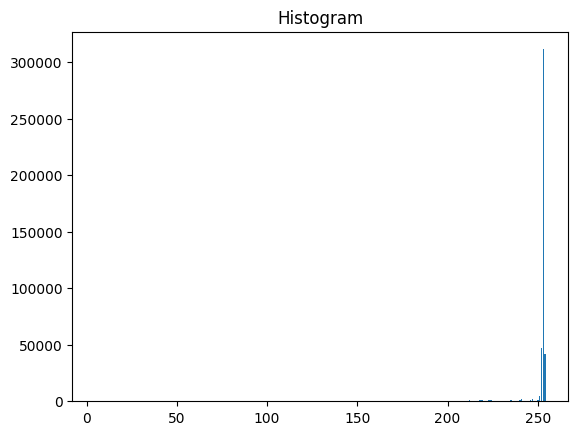

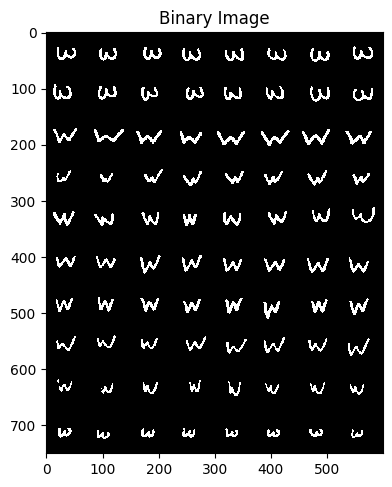

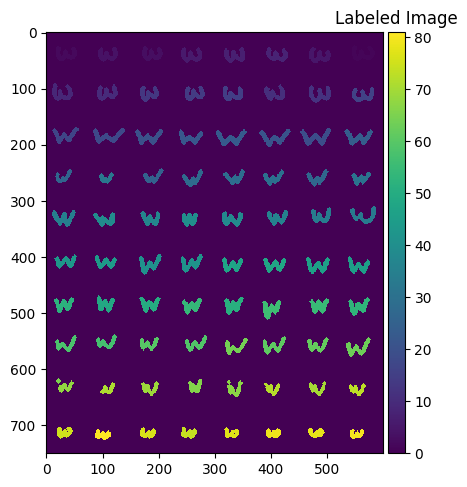

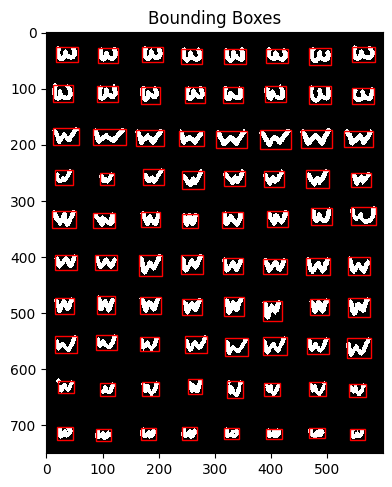

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


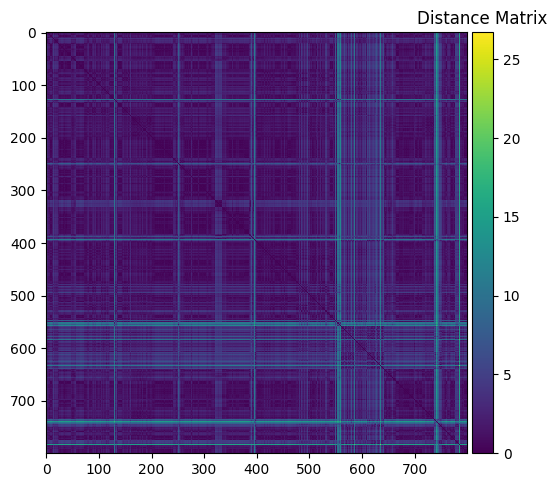

Recognition rate: 56.62%


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


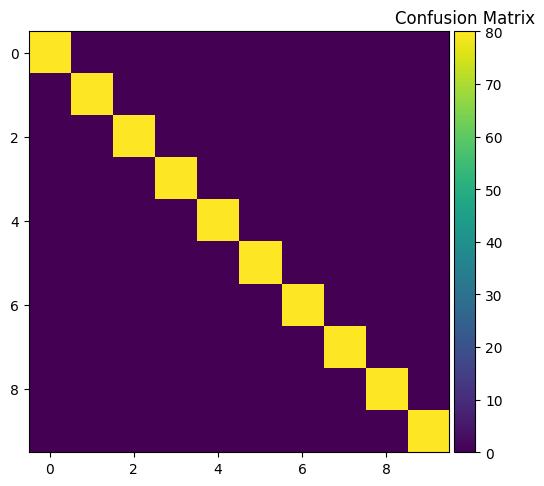

In [1]:
#RunMyOCR.py
import train
import trainingDatabase
import test
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import cdist
from skimage.measure import label, regionprops, moments, moments_central, moments_normalized, moments_hu
from skimage import io, exposure
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pickle

In [2]:
def calc_recognition_rate(detected_components, detected_classes, locations, classes):

  #rate = calc_recognition_rate(D_index, trainingDatabase.character_class, locations, classes)

  #Converting the labels in trainingDatabase.character_class to letters because the values in classes are in letters
  dictionary = {
      1: 'a',
      2: 'd',
     3: 'm',
      4: 'n',
      5: 'o',
      6: 'p',
      7: 'q',
      8: 'r',
      9: 'U',
      10: 'w'
  }

  letters = [dictionary[num] for num in detected_classes]
  print(letters)

  correct_predictions = 0
  k = 7
  for i in range(len(detected_components)):
    nearest_indices = detected_components[i, 1:k+1]
    print(f'dl: {nearest_indices}')
    nearest_labels = [trainingDatabase.character_class[idx2] for idx2 in nearest_indices]
    #print(f"locations: {nearest_labels}")
    detected_classes = max(set(nearest_labels), key=nearest_labels.count)
    #print(f"labels: {detected_classes}")
    #print(f"class: {trainingDatabase.character_class[i]}")
    #print(f"This are the values of predicted_label and character_class: {detected_classes}\n {trainingDatabase.character_class[i]}")
    if detected_classes == trainingDatabase.character_class[i]:
      correct_predictions += 1

  print(f'Predictions: {correct_predictions}')
  #print(f' Length: {len(detected_components)}')
  recognition_rate = correct_predictions / len(detected_components)

  return recognition_rate


In [3]:
def runMyOCR(inputFile):


  #Getting components
  D_index = test.testingImg(inputFile)
  #print(D_index)
  #Getting groundtruth character locations and classes
  pkl_file = open('test_gt_py3.pkl', 'rb')
  mydict = pickle.load(pkl_file)
  pkl_file.close()
  classes = mydict[b'classes']
  locations = mydict[b'locations']

  #print(D_index)
  #Comparing groundtruths with components that were recognized and detected
  rate = calc_recognition_rate(D_index, trainingDatabase.character_class, locations, classes)
  print(f'Recognition rate: {rate * 100:.2f} %')

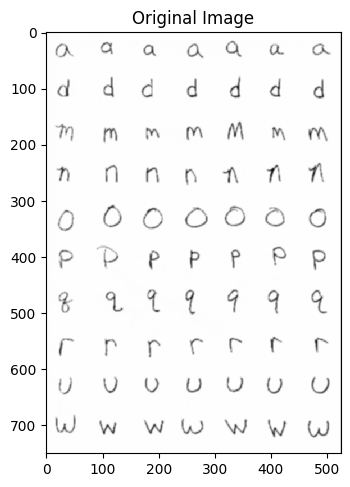

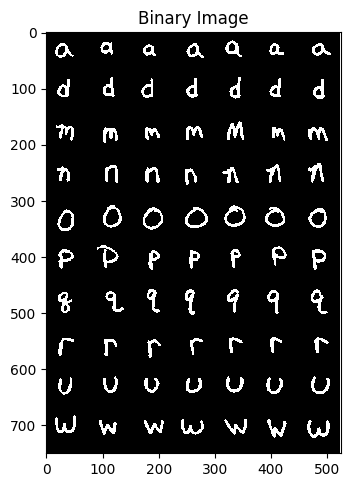

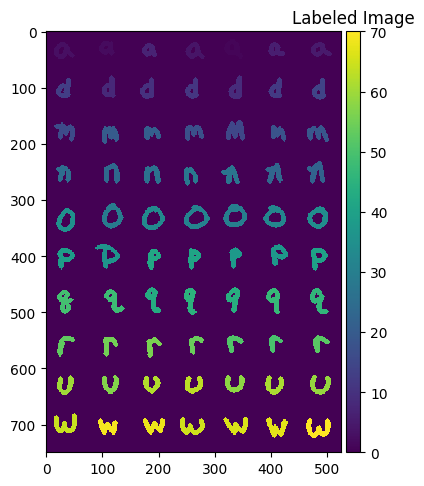

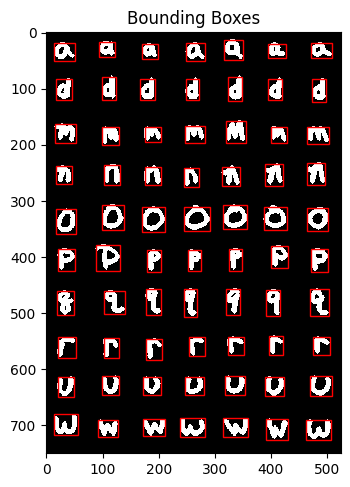

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


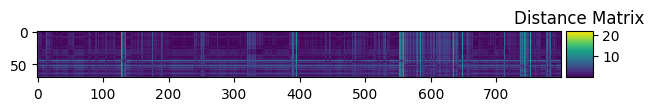

Number of components obtained for test image: 70
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 

In [4]:
runMyOCR('test.bmp')